# **Introduction à la modélisation**

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
train_data = pd.read_csv("C:/Users/cleme/Desktop/DM_ApStatAv/train-data.csv")
test_data = pd.read_csv("C:/Users/cleme/Desktop/DM_ApStatAv/test-data.csv")

In [12]:
print(train_data.shape)
print(test_data.shape)

(712, 25)
(179, 25)


In [8]:
train_data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.2292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.5000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.1000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,0.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
test_data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,35.0,7.1250,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,20.0,7.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,26.0,7.8958,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,58.0,146.5208,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,83.4750,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   Fare        712 non-null    float64
 3   Pclass_1    712 non-null    int64  
 4   Pclass_2    712 non-null    int64  
 5   Pclass_3    712 non-null    int64  
 6   Sex_female  712 non-null    int64  
 7   Sex_male    712 non-null    int64  
 8   SibSp_0     712 non-null    int64  
 9   SibSp_1     712 non-null    int64  
 10  SibSp_2     712 non-null    int64  
 11  SibSp_3     712 non-null    int64  
 12  SibSp_4     712 non-null    int64  
 13  SibSp_5     712 non-null    int64  
 14  SibSp_8     712 non-null    int64  
 15  Parch_0     712 non-null    int64  
 16  Parch_1     712 non-null    int64  
 17  Parch_2     712 non-null    int64  
 18  Parch_3     712 non-null    int64  
 19  Parch_4     712 non-null    i

# **3. Modélisation**
### **3.1. Split du jeu de données**

In [11]:
from sklearn.model_selection import train_test_split

### **On contrôle le découpage**

In [13]:
train_data['Survived'].value_counts(normalize=True)

0    0.606742
1    0.393258
Name: Survived, dtype: float64

In [14]:
test_data['Survived'].value_counts(normalize=True)

0    0.653631
1    0.346369
Name: Survived, dtype: float64

### **On isole les prédicteurs de la cible**

In [15]:
x_train = train_data.drop(['Survived'],axis = 1 ) 
x_test = test_data.drop(['Survived'],axis = 1 ) 

In [16]:
y_train = train_data['Survived'].values
y_test = test_data['Survived'].values

### **3.2. Test 2 classifiers**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [18]:
models = [
    LogisticRegression(random_state=42, solver = 'liblinear'),
    RandomForestClassifier(n_estimators=200, random_state=42)
]

CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LogisticRegression,0,0.790210
1,LogisticRegression,1,0.832168
2,LogisticRegression,2,0.753521
3,LogisticRegression,3,0.795775
4,LogisticRegression,4,0.823944
5,RandomForestClassifier,0,0.762238
6,RandomForestClassifier,1,0.804196
7,RandomForestClassifier,2,0.732394
8,RandomForestClassifier,3,0.795775
9,RandomForestClassifier,4,0.802817


In [19]:
cv_df_mean = cv_df.groupby('model_name')['accuracy'].mean().to_frame().reset_index()

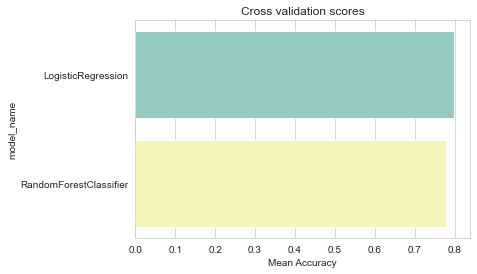

In [20]:
g = sns.barplot(x= "accuracy", y="model_name",data = cv_df_mean, palette="Set3",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

### **3.3. Optimisation de logistic**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [23]:
x_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,28.500000,7.2292,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,27.000000,10.5000,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,29.699118,16.1000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,29.699118,0.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,17.000000,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [24]:
x_train_scale

array([[-9.04942306e-02, -4.96597757e-01, -5.60047441e-01, ...,
         2.13600094e+00, -3.00586461e-01, -1.67555562e+00],
       [-2.06083596e-01, -4.33020011e-01, -5.60047441e-01, ...,
        -4.68164589e-01, -3.00586461e-01,  5.96816954e-01],
       [ 1.90926816e-03, -3.24167322e-01, -5.60047441e-01, ...,
        -4.68164589e-01, -3.00586461e-01,  5.96816954e-01],
       ...,
       [ 1.90926816e-03,  3.67382090e+00,  1.78556302e+00, ...,
        -4.68164589e-01, -3.00586461e-01,  5.96816954e-01],
       [-1.36197725e+00, -4.18602861e-01, -5.60047441e-01, ...,
         2.13600094e+00, -3.00586461e-01, -1.67555562e+00],
       [ 4.87452598e-01, -4.33020011e-01, -5.60047441e-01, ...,
        -4.68164589e-01, -3.00586461e-01,  5.96816954e-01]])

In [25]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


grid={"C":np.logspace(-3,3,7),
      "penalty":["l1","l2"]} # l1 lasso l2 ridge


logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg_cv = GridSearchCV(logreg,
                         grid,
                         cv=5)

logreg_cv.fit(x_train_scale,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.7935388555106865


In [27]:
pred = logreg_cv.predict(x_test_scale)
test_data['pred_scale_log'] = pred

In [28]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(test_data['Survived'], test_data['pred_scale_log'])

0.8212290502793296

### **3.4. Optimisation de la RF**

In [31]:
from sklearn.feature_selection import RFECV

In [32]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 6
Best features : Index(['Age', 'Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male'], dtype='object')


In [33]:
best_features = x_train.columns[rfecv.support_].tolist()
best_features

['Age', 'Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male']

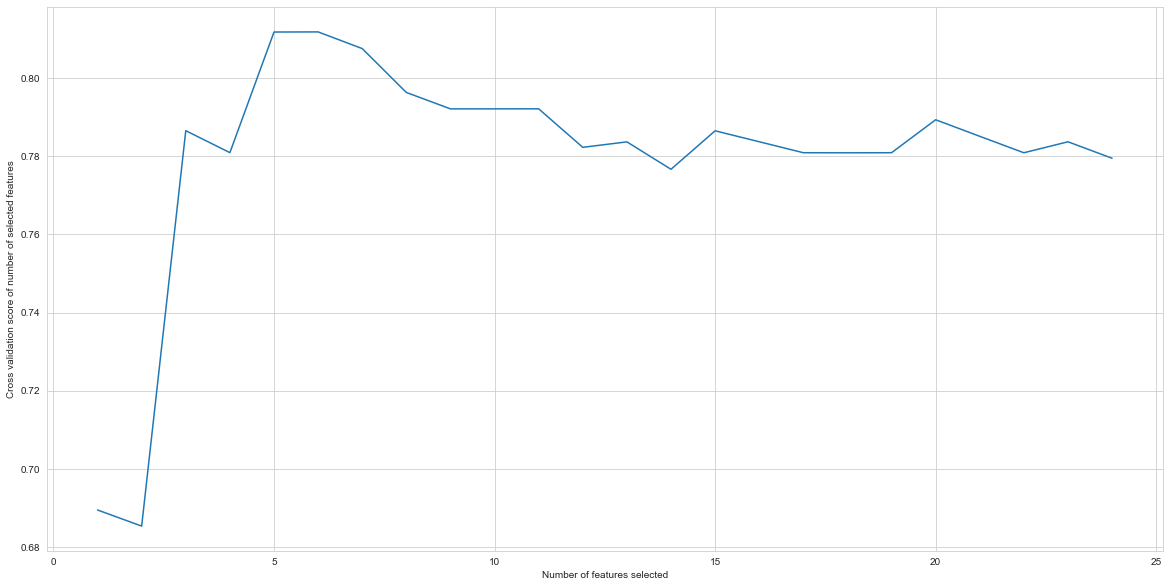

In [34]:
# Plot number of features VS. cross-validation scores

plt.figure(figsize=(20, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [35]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "random_state":[42],              
              "n_estimators" :[100,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, 
                     cv=5, 
                     scoring="accuracy", 
                     n_jobs= -1, 
                     verbose = 1)

gsRFC.fit(x_train[best_features],y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.79912341 0.79633606 0.79492761 0.80054171 0.80195016 0.80195016
 0.81737418 0.81739387 0.81878263 0.81601497 0.81460652 0.81461637
 0.81601497 0.81460652 0.81461637 0.81460652 0.81882202 0.81741357
 0.80895302 0.80614597 0.80895302 0.80895302 0.80614597 0.80895302
 0.80895302 0.80614597 0.80895302 0.7935487  0.7879346  0.78934305
 0.7907515  0.79495716 0.79495716 0.81316852 0.81457697 0.81457697
 0.79915296 0.80899242 0.80899242 0.79915296 0.80899242 0.80899242
 0.81177977 0.81316852 0.81176007 0.80475721 0.80756427 0.80757412
 0.80475721 0.80756427 0.80757412 0.80475721 0.80756427 0.80757412
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

0.8188220230473752

In [36]:
RFC_best

RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [37]:
RFC_final = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
RFC_final.fit(x_train[best_features],y_train)


RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=10,
                       random_state=42)

In [39]:
pred_rf = RFC_final.predict(x_test[best_features])
test_data['pred_scale_rf'] = pred_rf

In [42]:
accuracy_score(test_data['Survived'], test_data['pred_scale_rf'])

0.8659217877094972

### **3.5. Comparaison**

In [43]:
from sklearn import metrics

In [47]:
print('accuracy RF :', str(metrics.accuracy_score(test_data['Survived'], test_data['pred_scale_rf'], normalize=True, sample_weight=None)))
print(' ')
print(' ')
print(metrics.classification_report(test_data['Survived'], test_data['pred_scale_rf']))

accuracy RF : 0.8659217877094972
 
 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       117
           1       0.84      0.76      0.80        62

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



In [48]:
print('accuracy Logistic :', str(metrics.accuracy_score(test_data['Survived'], test_data['pred_scale_log'], normalize=True, sample_weight=None)))
print(' ')
print(' ')
print(metrics.classification_report(test_data['Survived'], test_data['pred_scale_log']))

accuracy Logistic : 0.8212290502793296
 
 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

